In [26]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
df = pd.read_excel('datos/datos.xlsx')
df.head()

,División de personal,AREA,ZONA / DPTO,Clave de sexo,Fecha nac.,CATEGORIA PROFESIONAL,PROVINCIA DE CENTRO DE TRABAJO,Indice Antigüedad,FORMACIÓN UNIVERSITARIA,PRIVINCIA DE RESIDENCIA,Cód.postal,Población de residencia,Clave de país
0,Servicios Centrales-Arrasate,AREA DE PERSONAS Y MEDIOS,OPERACIONES E INMOV. Y SERVICIOS GRALES.,masculino,1960-01-31,TECNICOS/AS SSCC,Gipuzkoa,0.45,ENSENANZA GENERAL BASICA,Gipuzkoa,20500,MONDRAGON,España
1,Red,RED COMERCIAL 1-EKIA,ZONA9 CATALUNYA,masculino,1960-12-02,GESTOR OPERATIVO,Barcelona,0.40,FORMA.PROFESO.2 GRADO RAMA ADMINIS.,Barcelona,8028,BARCELONA,España
2,Red,RED COMERCIAL 1-EKIA,ZONA4 NAFARROA-BAT,femenino,1964-09-21,GESTOR OPERATIVO,Navarra,0.35,DIPLOM. CC.EMPRESARIALES,Navarra,31610,VILLAVA,España
3,Red,RED COMERCIAL 1-EKIA,ZONA3 DONOSTIALDEA,femenino,1967-04-19,GESTOR COMERCIAL,Gipuzkoa,0.35,SECRETARIA DE DIRECCION,Gipuzkoa,20008,DONOSTIA,España
4,Red,RED COMERCIAL 1-EKIA,ZONA5 NAFARROA-BI,femenino,1966-07-04,GESTOR COMERCIAL,Navarra,0.35,DIPLOM. CC.EMPRESARIALES,Navarra,31194,ORICAIN,España


In [3]:
df.shape

(1882, 13)

In [4]:
#Informacion general del df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   División de personal            1882 non-null   object        
 1   AREA                            1876 non-null   object        
 2   ZONA / DPTO                     1807 non-null   object        
 3   Clave de sexo                   1882 non-null   object        
 4   Fecha nac.                      1882 non-null   datetime64[ns]
 5   CATEGORIA PROFESIONAL           1882 non-null   object        
 6   PROVINCIA DE CENTRO DE TRABAJO  1882 non-null   object        
 7   Indice Antigüedad               1882 non-null   float64       
 8   FORMACIÓN UNIVERSITARIA         1882 non-null   object        
 9   PRIVINCIA DE RESIDENCIA         1882 non-null   object        
 10  Cód.postal                      1882 non-null   int64         
 11  Pobl

In [5]:
print(df.describe(include='object'))

       División de personal                         AREA   ZONA / DPTO  \
count                  1882                         1876          1807   
unique                    2                           19            53   
top                     Red  RED COMERCIAL 2-MENDEBALDEA  RED EMPRESAS   
freq                   1343                          680           115   

       Clave de sexo CATEGORIA PROFESIONAL PROVINCIA DE CENTRO DE TRABAJO  \
count           1882                  1882                           1882   
unique             2                     6                             17   
top         femenino      GESTOR COMERCIAL                       Gipuzkoa   
freq             990                   737                            783   

           FORMACIÓN UNIVERSITARIA PRIVINCIA DE RESIDENCIA  \
count                         1882                    1882   
unique                          81                      20   
top     CIENC. ECON. O EMPRESARIAL                 Bizkai

VALORES NULOS

In [6]:
#Valores nulos y porcentaje por columna
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
print("\nValores nulos por columna:")
print(pd.DataFrame({'Nulos': missing_data, '% del total': missing_percent}))



Valores nulos por columna:
                                Nulos  % del total
División de personal                0     0.000000
AREA                                6     0.318810
ZONA / DPTO                        75     3.985122
Clave de sexo                       0     0.000000
Fecha nac.                          0     0.000000
CATEGORIA PROFESIONAL               0     0.000000
PROVINCIA DE CENTRO DE TRABAJO      0     0.000000
Indice Antigüedad                   0     0.000000
FORMACIÓN UNIVERSITARIA             0     0.000000
PRIVINCIA DE RESIDENCIA             0     0.000000
Cód.postal                          0     0.000000
Población de residencia             0     0.000000
Clave de país                       0     0.000000


In [7]:
df[df['AREA'].isnull()] #Confirmamos que los NA de AREA coinciden con NA en ZONA/DPTO

,División de personal,AREA,ZONA / DPTO,Clave de sexo,Fecha nac.,CATEGORIA PROFESIONAL,PROVINCIA DE CENTRO DE TRABAJO,Indice Antigüedad,FORMACIÓN UNIVERSITARIA,PRIVINCIA DE RESIDENCIA,Cód.postal,Población de residencia,Clave de país
58,Servicios Centrales-Arrasate,NaN,NaN,masculino,1966-12-07,DIRECCIONES SSCC,Gipuzkoa,0.30,CIENC. ECON. O EMPRESARIAL,Gipuzkoa,20100,ERRENTERIA,España
826,Servicios Centrales-Arrasate,NaN,NaN,femenino,1978-11-27,DIRECCIONES SSCC,Gipuzkoa,0.15,EXACTAS,Bizkaia,48450,ETXABARRI,España
1338,Servicios Centrales-Arrasate,NaN,NaN,femenino,1982-02-25,GESTOR OPERATIVO SSCC,Gipuzkoa,0.10,SECRETARIADO,Bizkaia,48960,GALDAKAO,España
1439,Servicios Centrales-Arrasate,NaN,NaN,femenino,1970-06-02,DIRECCIONES SSCC,Gipuzkoa,0.20,05-Licenciatura en Derecho,Gipuzkoa,20560,oñati,España
1503,Servicios Centrales-Arrasate,NaN,NaN,femenino,1978-01-08,GESTOR OPERATIVO SSCC,Gipuzkoa,0.05,SECRETARIA DE DIRECCION,Gipuzkoa,20500,ARETXABALETA,España
1800,Servicios Centrales-Arrasate,NaN,NaN,masculino,1987-04-22,DIRECCIONES SSCC,Gipuzkoa,0.00,02-Lic. en Administración y Direc. Emp.,Bizkaia,48003,BILBAO,España


In [8]:
#Reemplazamos NA con valor de fuera de organigrama, tal y como se nos ha comentado
df = df.fillna('Fuera de organigrama')

In [9]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
print("\nValores nulos por columna:")
print(pd.DataFrame({'Nulos': missing_data, '% del total': missing_percent}))


Valores nulos por columna:
                                Nulos  % del total
División de personal                0          0.0
AREA                                0          0.0
ZONA / DPTO                         0          0.0
Clave de sexo                       0          0.0
Fecha nac.                          0          0.0
CATEGORIA PROFESIONAL               0          0.0
PROVINCIA DE CENTRO DE TRABAJO      0          0.0
Indice Antigüedad                   0          0.0
FORMACIÓN UNIVERSITARIA             0          0.0
PRIVINCIA DE RESIDENCIA             0          0.0
Cód.postal                          0          0.0
Población de residencia             0          0.0
Clave de país                       0          0.0


In [10]:
#Convertimos todos los valores a mayusculas
df = df_mayusculas = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)
df.head()

C:\Users\guill\AppData\Local\Temp\ipykernel_20748\4176210728.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df_mayusculas = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)


,División de personal,AREA,ZONA / DPTO,Clave de sexo,Fecha nac.,CATEGORIA PROFESIONAL,PROVINCIA DE CENTRO DE TRABAJO,Indice Antigüedad,FORMACIÓN UNIVERSITARIA,PRIVINCIA DE RESIDENCIA,Cód.postal,Población de residencia,Clave de país
0,SERVICIOS CENTRALES-ARRASATE,AREA DE PERSONAS Y MEDIOS,OPERACIONES E INMOV. Y SERVICIOS GRALES.,MASCULINO,1960-01-31,TECNICOS/AS SSCC,GIPUZKOA,0.45,ENSENANZA GENERAL BASICA,GIPUZKOA,20500,MONDRAGON,ESPAÑA
1,RED,RED COMERCIAL 1-EKIA,ZONA9 CATALUNYA,MASCULINO,1960-12-02,GESTOR OPERATIVO,BARCELONA,0.40,FORMA.PROFESO.2 GRADO RAMA ADMINIS.,BARCELONA,8028,BARCELONA,ESPAÑA
2,RED,RED COMERCIAL 1-EKIA,ZONA4 NAFARROA-BAT,FEMENINO,1964-09-21,GESTOR OPERATIVO,NAVARRA,0.35,DIPLOM. CC.EMPRESARIALES,NAVARRA,31610,VILLAVA,ESPAÑA
3,RED,RED COMERCIAL 1-EKIA,ZONA3 DONOSTIALDEA,FEMENINO,1967-04-19,GESTOR COMERCIAL,GIPUZKOA,0.35,SECRETARIA DE DIRECCION,GIPUZKOA,20008,DONOSTIA,ESPAÑA
4,RED,RED COMERCIAL 1-EKIA,ZONA5 NAFARROA-BI,FEMENINO,1966-07-04,GESTOR COMERCIAL,NAVARRA,0.35,DIPLOM. CC.EMPRESARIALES,NAVARRA,31194,ORICAIN,ESPAÑA


In [11]:
df['Edad'] = df['Fecha nac.'].apply(lambda fecha: datetime.now().year - fecha.year - ((datetime.now().month, datetime.now().day) < (fecha.month, fecha.day)))
df = df.drop(columns='Fecha nac.')
df.head(5)

,División de personal,AREA,ZONA / DPTO,Clave de sexo,CATEGORIA PROFESIONAL,PROVINCIA DE CENTRO DE TRABAJO,Indice Antigüedad,FORMACIÓN UNIVERSITARIA,PRIVINCIA DE RESIDENCIA,Cód.postal,Población de residencia,Clave de país,Edad
0,SERVICIOS CENTRALES-ARRASATE,AREA DE PERSONAS Y MEDIOS,OPERACIONES E INMOV. Y SERVICIOS GRALES.,MASCULINO,TECNICOS/AS SSCC,GIPUZKOA,0.45,ENSENANZA GENERAL BASICA,GIPUZKOA,20500,MONDRAGON,ESPAÑA,64
1,RED,RED COMERCIAL 1-EKIA,ZONA9 CATALUNYA,MASCULINO,GESTOR OPERATIVO,BARCELONA,0.40,FORMA.PROFESO.2 GRADO RAMA ADMINIS.,BARCELONA,8028,BARCELONA,ESPAÑA,64
2,RED,RED COMERCIAL 1-EKIA,ZONA4 NAFARROA-BAT,FEMENINO,GESTOR OPERATIVO,NAVARRA,0.35,DIPLOM. CC.EMPRESARIALES,NAVARRA,31610,VILLAVA,ESPAÑA,60
3,RED,RED COMERCIAL 1-EKIA,ZONA3 DONOSTIALDEA,FEMENINO,GESTOR COMERCIAL,GIPUZKOA,0.35,SECRETARIA DE DIRECCION,GIPUZKOA,20008,DONOSTIA,ESPAÑA,57
4,RED,RED COMERCIAL 1-EKIA,ZONA5 NAFARROA-BI,FEMENINO,GESTOR COMERCIAL,NAVARRA,0.35,DIPLOM. CC.EMPRESARIALES,NAVARRA,31194,ORICAIN,ESPAÑA,58


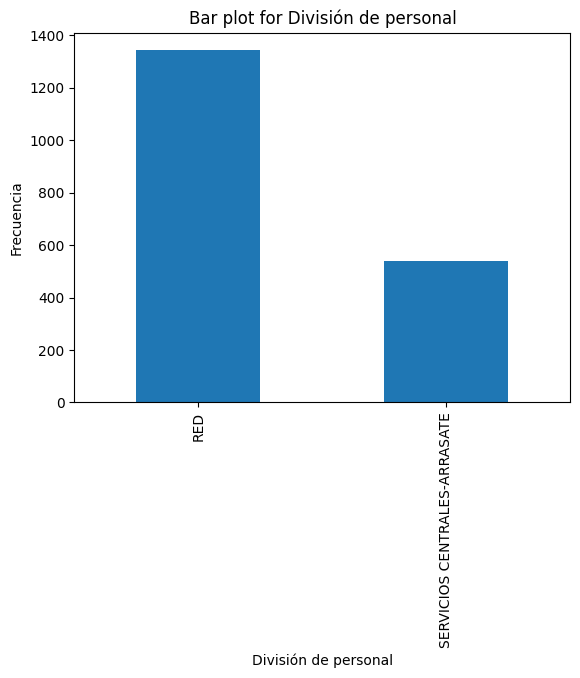

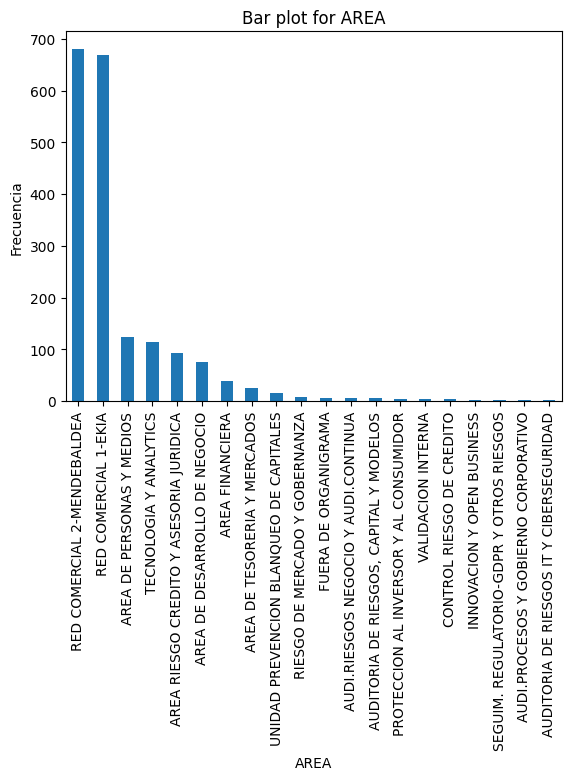

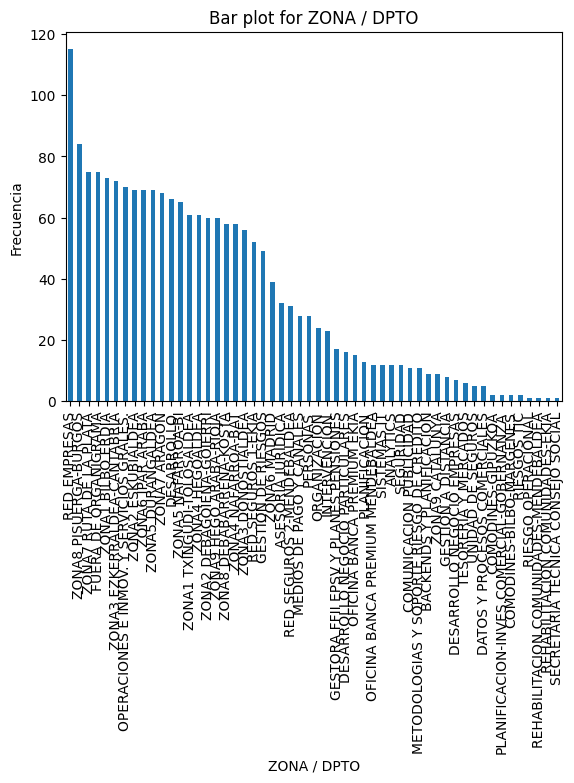

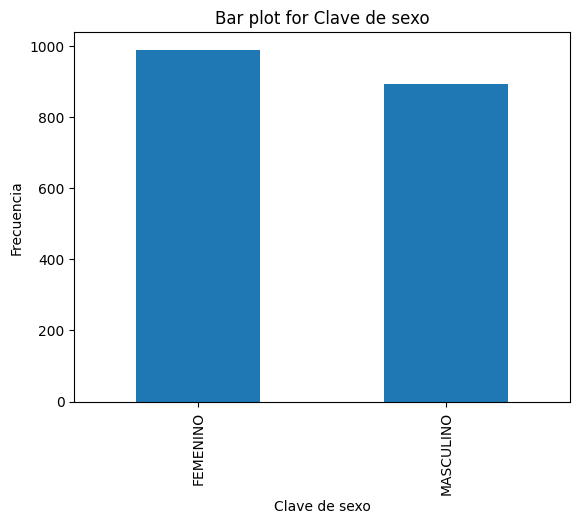

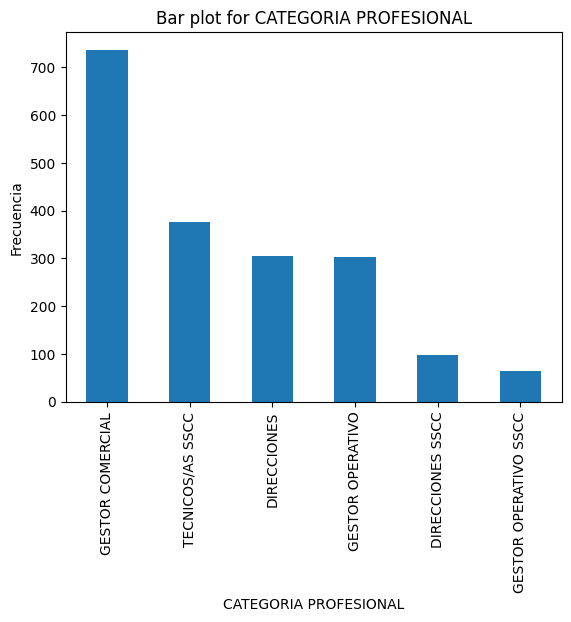

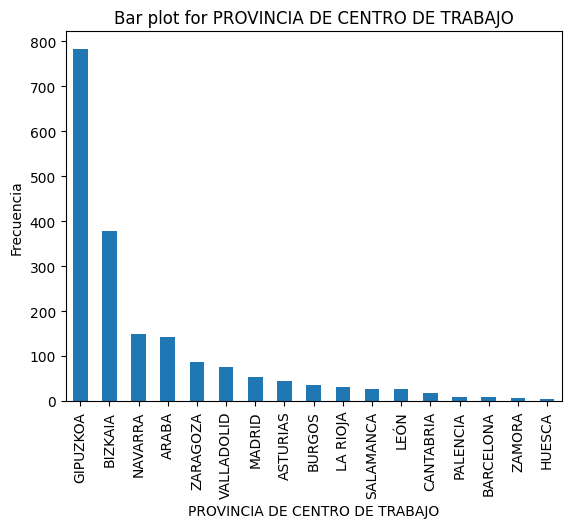

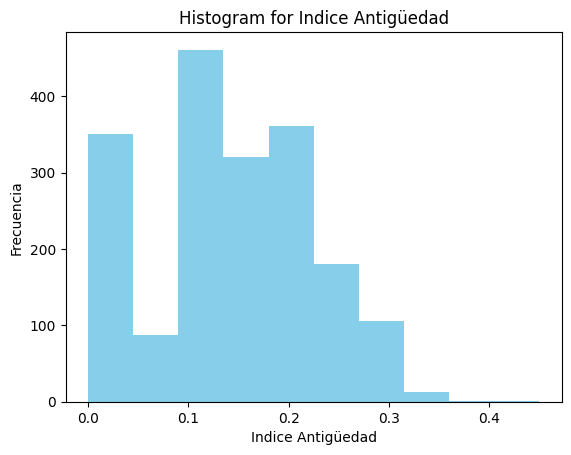

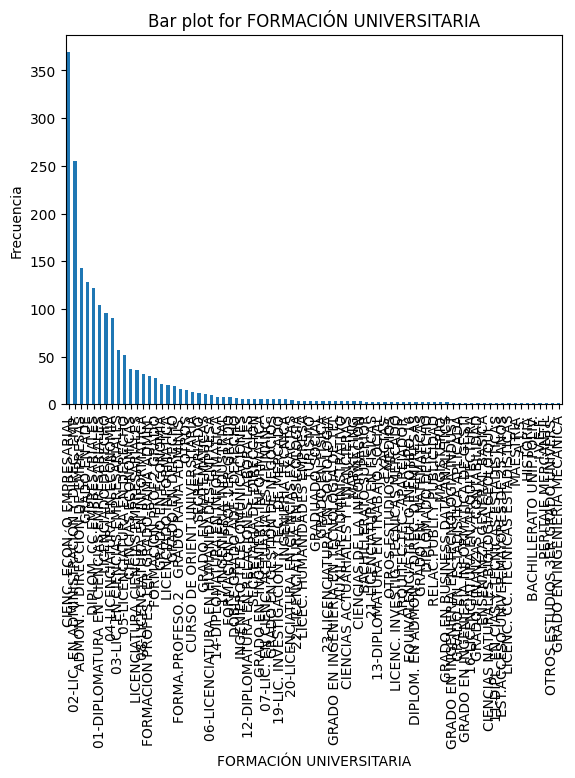

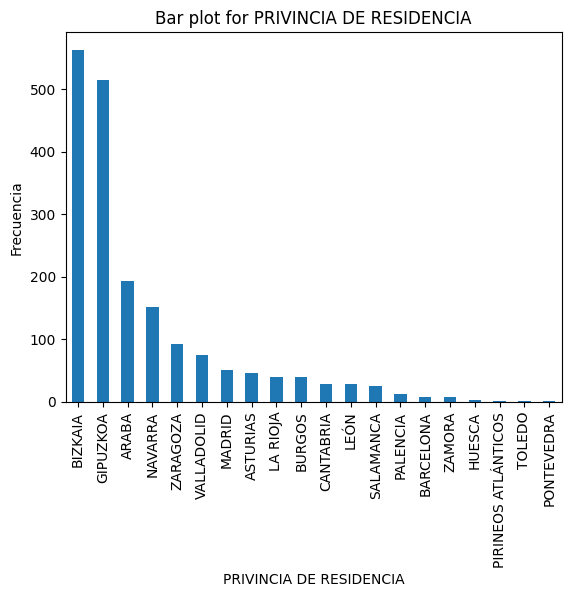

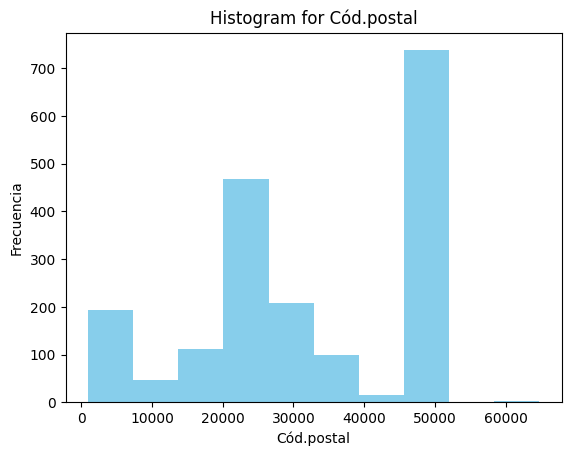

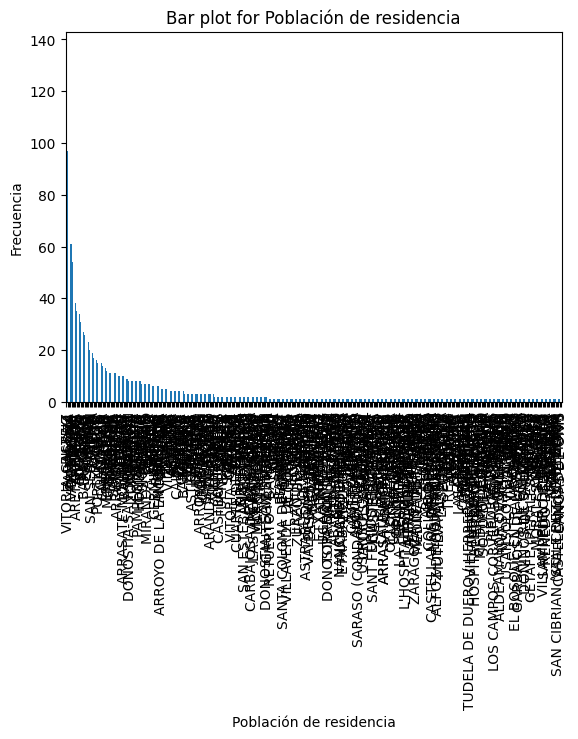

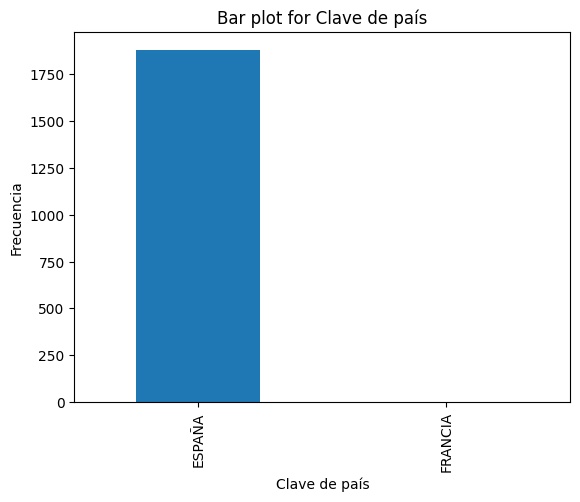

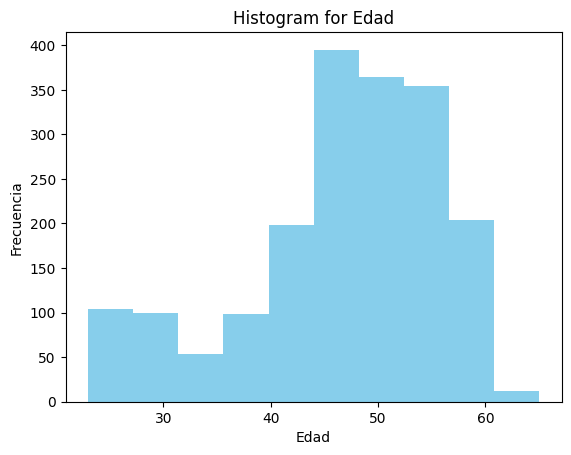

In [12]:
for columna in df.columns:
    if df[columna].dtype == 'object':  # Si es una columna categórica (texto)
        df[columna].value_counts().plot(kind='bar', title=f'Bar plot for {columna}')
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')
        plt.show()
    elif pd.api.types.is_numeric_dtype(df[columna]):  # Si es una columna numérica
        df[columna].plot(kind='hist', title=f'Histogram for {columna}', bins=10, color='skyblue')
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')
        plt.show()

### ANALISIS DE LA PLANTILLA

Piramide de edades

In [ ]:
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
df['Grupo de Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)

In [17]:
#Distribucion de edad por genero
gender_age = df.groupby(['Grupo de Edad', 'Clave de sexo'])['Clave de sexo'].count().unstack()
gender_age

C:\Users\guill\AppData\Local\Temp\ipykernel_20748\3665623961.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age = df.groupby(['Grupo de Edad', 'Clave de sexo'])['Clave de sexo'].count().unstack()


Clave de sexo,FEMENINO,MASCULINO
Grupo de Edad,,
20-29,89,82
30-39,122,62
40-49,384,296
50-59,387,419
60-69,8,33


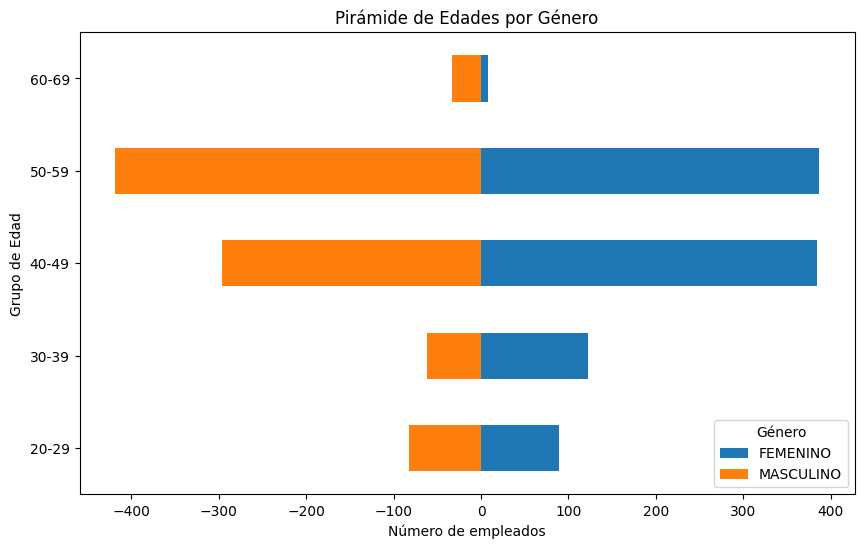

In [18]:
# Graficar la pirámide de edades
fig, ax = plt.subplots(figsize=(10, 6))
gender_age['MASCULINO'] = -gender_age['MASCULINO']  # Invertir masculino para pirámide

gender_age.plot(kind='barh', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])
ax.set_title("Pirámide de Edades por Género")
ax.set_xlabel("Número de empleados")
ax.set_ylabel("Grupo de Edad")
ax.legend(title="Género", loc="lower right")
plt.show()

Distribucion geografica

In [21]:
valores_por_provincia = df['PROVINCIA DE CENTRO DE TRABAJO'].value_counts()
valores_por_provincia

PROVINCIA DE CENTRO DE TRABAJO
GIPUZKOA      783
BIZKAIA       378
NAVARRA       149
ARABA         143
ZARAGOZA       87
VALLADOLID     76
MADRID         53
ASTURIAS       45
BURGOS         35
LA RIOJA       31
SALAMANCA      27
LEÓN           27
CANTABRIA      19
PALENCIA       10
BARCELONA       9
ZAMORA          6
HUESCA          4
Name: count, dtype: int64

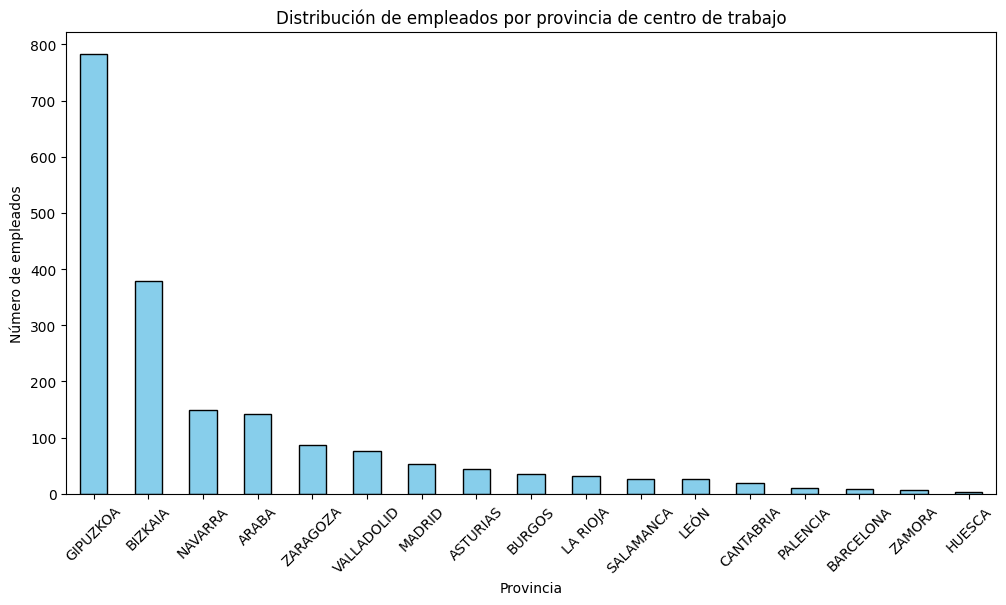

In [23]:
plt.figure(figsize=(12, 6))
valores_por_provincia.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribución de empleados por provincia de centro de trabajo")
plt.xlabel("Provincia")
plt.ylabel("Número de empleados")
plt.xticks(rotation=45)
plt.show()

Analisis Categoria Profesional y estudios academoicos

In [25]:
categoria_estudios = df.groupby(['FORMACIÓN UNIVERSITARIA', 'CATEGORIA PROFESIONAL']).size().unstack().fillna(0)
categoria_estudios

CATEGORIA PROFESIONAL,DIRECCIONES,DIRECCIONES SSCC,GESTOR COMERCIAL,GESTOR OPERATIVO,GESTOR OPERATIVO SSCC,TECNICOS/AS SSCC
FORMACIÓN UNIVERSITARIA,,,,,,
01-DIPLOMATURA EN CIENCIAS EMPRESARIALES,13.0,2.0,56.0,15.0,3.0,15.0
02-LIC. EN ADMINISTRACIÓN Y DIREC. EMP.,41.0,11.0,138.0,11.0,3.0,51.0
03-LIC. EN CIENCIAS EMPRESARIALES,15.0,5.0,20.0,1.0,3.0,13.0
04-LICENCIATURA EN ECONOMIA,17.0,3.0,39.0,12.0,3.0,16.0
05-LICENCIATURA EN DERECHO,6.0,7.0,17.0,5.0,1.0,16.0
...,...,...,...,...,...,...
PERITAJE MERCANTIL,0.0,0.0,0.0,0.0,0.0,1.0
RELAC.PUBLI.Y PUBLICIDAD,0.0,1.0,1.0,0.0,0.0,0.0
SECRETARIA DE DIRECCION,0.0,0.0,3.0,1.0,1.0,1.0


In [28]:
df['FORMACIÓN UNIVERSITARIA'].unique()

array(['ENSENANZA GENERAL BASICA',
       'FORMA.PROFESO.2   GRADO RAMA ADMINIS.',
       'DIPLOM. CC.EMPRESARIALES', 'SECRETARIA DE DIRECCION',
       'CIENC. ECON. O EMPRESARIAL', 'LICENCIADO DERECHO', 'SECRETARIADO',
       'MAGISTERIO', '01-DIPLOMATURA EN CIENCIAS EMPRESARIALES',
       'CURSO DE ORIENT.UNIVERSITARIA',
       'OTROS ESTUDIOS 3ER GRADO UNIVERS.', 'GRADUADO SOCIAL',
       'LICENCIADO INFORMATICA', 'TURISMO', 'CIENCIAS DE LA INFORMACION',
       '05-LICENCIATURA EN DERECHO', 'PERITAJE MERCANTIL',
       'FORMACION PROF.2 GRADO', 'I.V.E.F.',
       'LICENCIATURA CIENCIAS EMPRESARIALES', 'RELAC.PUBLI.Y PUBLICIDAD',
       '03-LIC. EN CIENCIAS EMPRESARIALES', 'DIPLOMADO DERECHO',
       'ADMON. Y DIRECCION DE EMPRESAS', '04-LICENCIATURA EN ECONOMIA',
       'GRADO EN ADE', 'BACHILLERATO UNIF.POLIV.',
       '14-DIPLOMATURA EN INFORMATICA',
       '02-LIC. EN ADMINISTRACIÓN Y DIREC. EMP.', 'HISTORIA',
       'DIPLOM. EN ADMON. Y DIREC. DE EMPRESAS', 'MARKETING',
       '

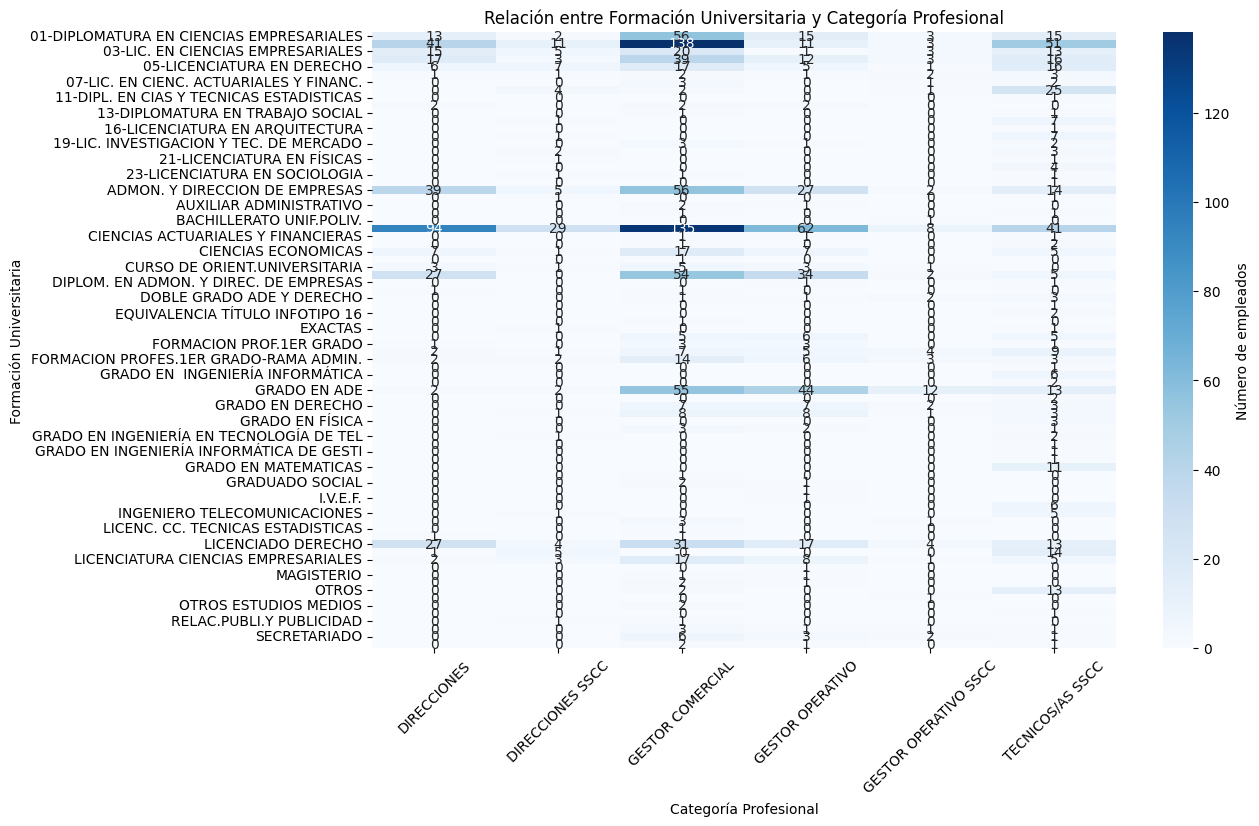

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(categoria_estudios, annot=True, fmt=".0f", cmap="Blues", cbar_kws={'label': 'Número de empleados'})
plt.title("Relación entre Formación Universitaria y Categoría Profesional")
plt.xlabel("Categoría Profesional")
plt.ylabel("Formación Universitaria")
plt.xticks(rotation=45)
plt.show()
